In [1]:
!pip install scalecast
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
from scalecast.SeriesTransformer import SeriesTransformer
from scalecast.util import metrics

In [24]:
# sns.set(rc={'figure.figsize':(15,8)})
df = pd.read_csv('monthly1971-2020.csv',parse_dates=['Month'])


<AxesSubplot:>

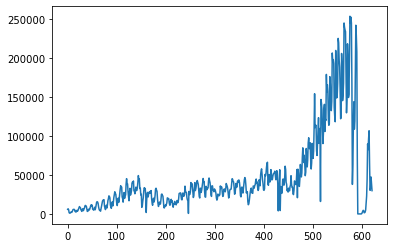

In [3]:
df['Arrivals'].plot()

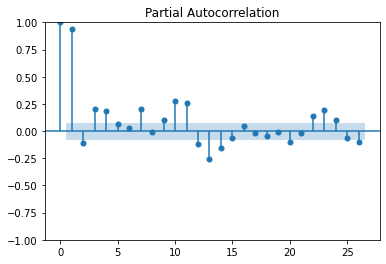

In [4]:
f = Forecaster(y=df['Arrivals'],current_dates=df['Month'])
transformer = SeriesTransformer(f)
f.plot_pacf(lags=26)
plt.show()

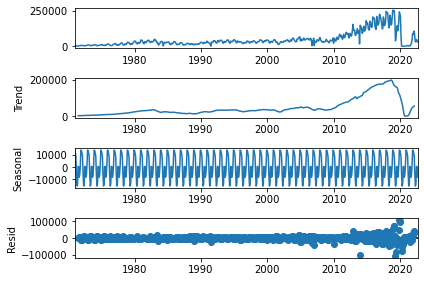

In [5]:
f.seasonal_decompose().plot()
plt.show()

In [6]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(f"stat: {stat}, P-val: {pval}")

stat: -2.3373590484415367, P-val: 0.160201796937591


In [7]:
#pvalue not less than 0.05. Hence data  is non-stationary

In [8]:
f = transformer.DiffTransform(12)

In [9]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(f"stat: {stat}, P-val: {pval}")

stat: -5.996792177065337, P-val: 1.694094673043943e-07


In [10]:
# P values is almost 0. Hence data is now stationary

In [11]:
f.set_test_length(50)
f.generate_future_dates(50)
f.set_estimator('lstm')

18/18 [==============================] - 0s 891us/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

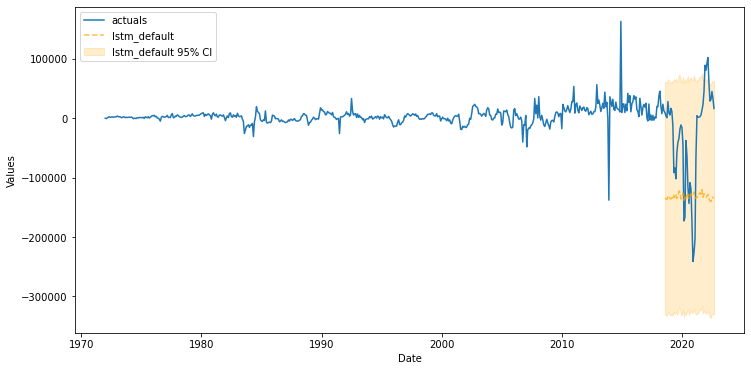

In [12]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

17/17 [==============================] - 0s 2ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

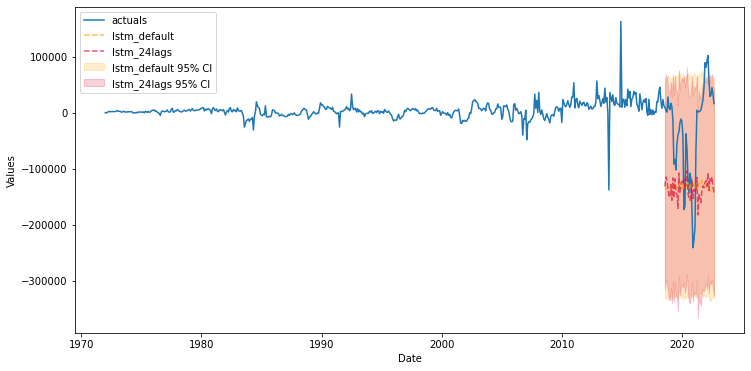

In [13]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Epoch 1/5
13/13 [==============================] - 2s 56ms/step - loss: 0.4833 - val_loss: 0.4620
Epoch 2/5
13/13 [==============================] - 0s 8ms/step - loss: 0.4570 - val_loss: 0.4373
Epoch 3/5
13/13 [==============================] - 0s 8ms/step - loss: 0.4319 - val_loss: 0.4100
Epoch 4/5
13/13 [==============================] - 0s 8ms/step - loss: 0.4017 - val_loss: 0.3737
Epoch 5/5
1/1 [==============================] - 0s 249ms/step
Epoch 1/5
14/14 [==============================] - 2s 30ms/step - loss: 0.5813 - val_loss: 0.5597
Epoch 2/5
14/14 [==============================] - 0s 8ms/step - loss: 0.5370 - val_loss: 0.4997
Epoch 3/5
14/14 [==============================] - 0s 8ms/step - loss: 0.4561 - val_loss: 0.3849
Epoch 4/5
14/14 [==============================] - 0s 7ms/step - loss: 0.3329 - val_loss: 0.2681
Epoch 5/5
17/17 [==============================] - 0s 2ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

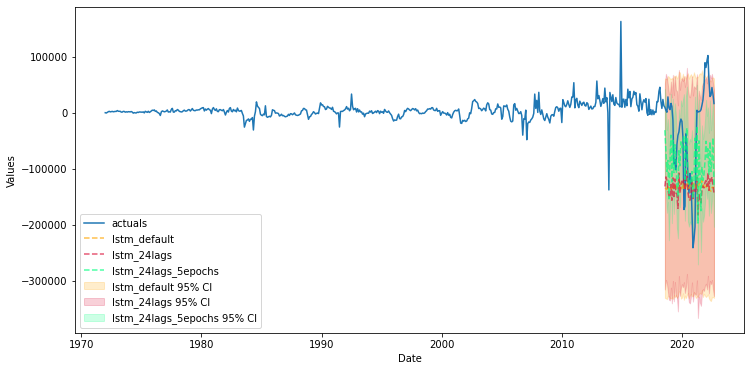

In [14]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/25
13/13 [==============================] - 5s 103ms/step - loss: 0.4543 - val_loss: 0.4147
Epoch 2/25
13/13 [==============================] - 0s 19ms/step - loss: 0.3681 - val_loss: 0.2800
Epoch 3/25
13/13 [==============================] - 0s 19ms/step - loss: 0.2457 - val_loss: 0.1799
Epoch 4/25
13/13 [==============================] - 0s 19ms/step - loss: 0.1516 - val_loss: 0.1015
Epoch 5/25
13/13 [==============================] - 0s 19ms/step - loss: 0.0879 - val_loss: 0.0492
Epoch 6/25
13/13 [==============================] - 0s 18ms/step - loss: 0.0533 - val_loss: 0.0280
Epoch 7/25
13/13 [==============================] - 0s 18ms/step - loss: 0.0401 - val_loss: 0.0176
Epoch 8/25
13/13 [==============================] - 0s 18ms/step - loss: 0.0336 - val_loss: 0.0141
Epoch 9/25
13/13 [==============================] - 0s 18ms/step - loss: 0.0326 - val_loss: 0.0135
Epoch 10/25
13/13 [==============================] - 0s 19ms/step - loss: 0.0325 - val_loss: 0.0126
Epoch 11

<AxesSubplot:xlabel='Date', ylabel='Values'>

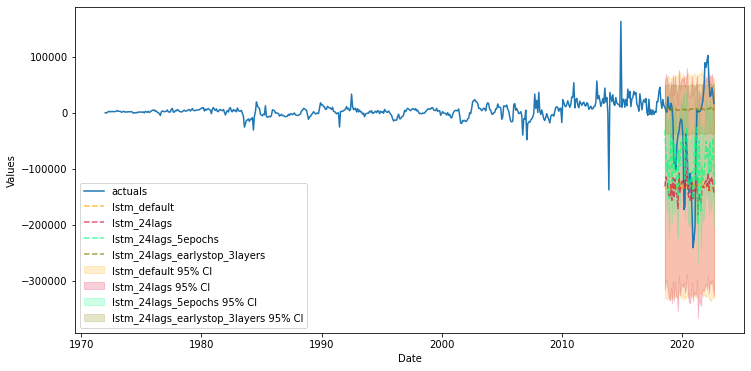

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

Epoch 1/15
12/12 [==============================] - 6s 150ms/step - loss: 0.3289 - val_loss: 0.1231
Epoch 2/15
12/12 [==============================] - 1s 66ms/step - loss: 0.0823 - val_loss: 0.0402
Epoch 3/15
12/12 [==============================] - 1s 65ms/step - loss: 0.0439 - val_loss: 0.0221
Epoch 4/15
12/12 [==============================] - 1s 64ms/step - loss: 0.0352 - val_loss: 0.0185
Epoch 5/15
12/12 [==============================] - 1s 64ms/step - loss: 0.0338 - val_loss: 0.0167
Epoch 6/15
12/12 [==============================] - 1s 64ms/step - loss: 0.0332 - val_loss: 0.0160
Epoch 7/15
12/12 [==============================] - 1s 64ms/step - loss: 0.0329 - val_loss: 0.0163
Epoch 8/15
12/12 [==============================] - 1s 64ms/step - loss: 0.0327 - val_loss: 0.0182
Epoch 9/15
12/12 [==============================] - 1s 63ms/step - loss: 0.0335 - val_loss: 0.0162
Epoch 10/15
12/12 [==============================] - 1s 64ms/step - loss: 0.0330 - val_loss: 0.0157
Epoch 11

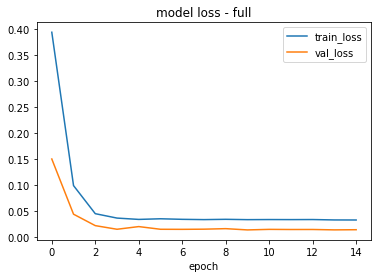

17/17 [==============================] - 0s 17ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

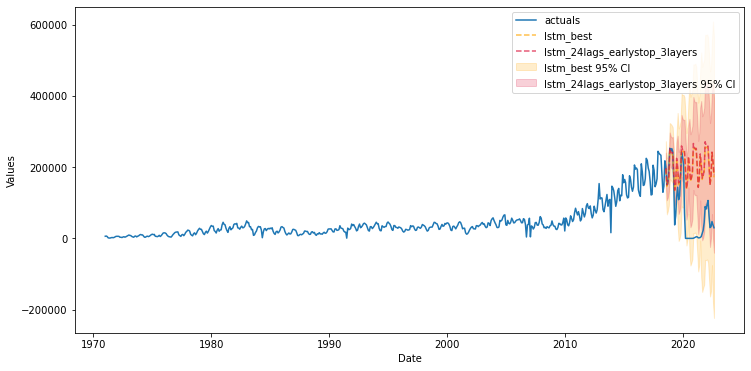

In [16]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f = transformer.DiffRevert(12)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

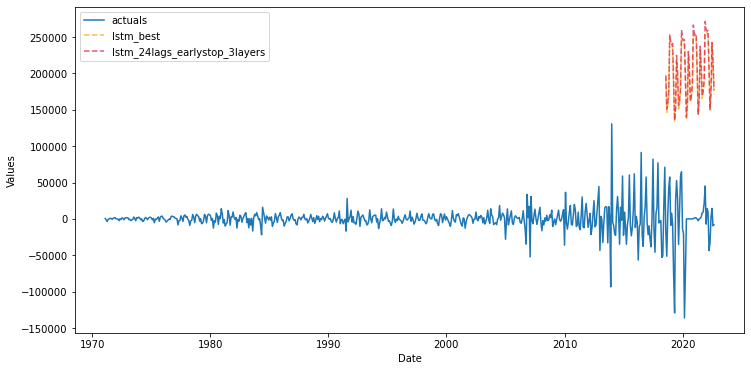

In [43]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetR2',models='top_2')


<AxesSubplot:xlabel='Date', ylabel='Values'>

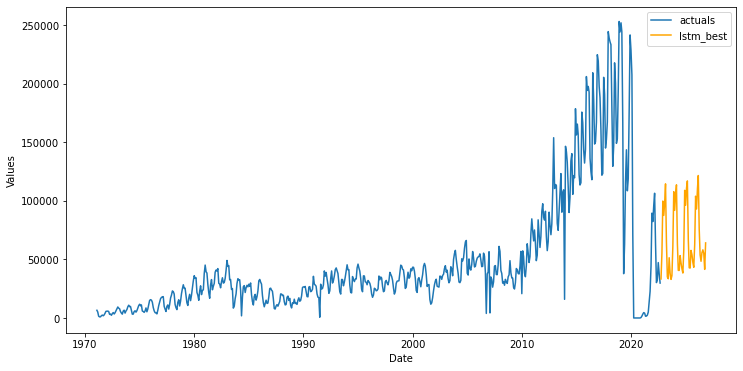

In [40]:
f.plot(models=['lstm_best'],
       order_by='LevelTestSetR2',
       level=True)

In [41]:
f.export('model_summaries',determine_best_by='LevelTestSetR2')[
    ['ModelNickname',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm_best,145056.512751,-1.860028,True
1,lstm_24lags_earlystop_3layers,148927.574542,-2.014714,False
2,mlr,166797.970144,-2.781615,False
3,lstm_24lags_5epochs,170600.474594,-2.956000,False
4,lstm_default,267083.760349,-8.695960,False
5,lstm_24lags,281154.947530,-9.744527,False


In [17]:
fitted_vals=f.export_fitted_vals('lstm_best',False)

In [18]:
fitted_vals

,DATE,Actuals,FittedVals,Residuals
0,1975-02-01,10388.0,19356.418521,-8968.418521
1,1975-03-01,11158.0,19556.381790,-8398.381790
2,1975-04-01,5890.0,16110.248731,-10220.248731
3,1975-05-01,5587.0,12952.645470,-7365.645470
4,1975-06-01,4787.0,13015.584657,-8228.584657
...,...,...,...,...
567,2022-05-01,30207.0,438542.261177,-408335.261177
568,2022-06-01,32856.0,450427.440128,-417571.440128
569,2022-07-01,47290.0,457107.913858,-409817.913858
570,2022-08-01,37760.0,441538.663905,-403778.663905


In [19]:
def compute_error_metrics(model_nick_name,df):
    mae=metrics.mae(df['Actuals'],df['FittedVals'])
    rmse=metrics.rmse(df['Actuals'],df['FittedVals'])
    mse=metrics.mse(df['Actuals'],df['FittedVals'])
    
    print(f"mean absolute error for {model_nick_name}: {mae}")
    print(f"root mean squared error for {model_nick_name}: {rmse}")
    print(f"mean squared error for {model_nick_name}: {mse}")

    return mae, rmse, mse

In [20]:
mae,rmse,mse=compute_error_metrics('lstm_best',fitted_vals)

mean absolute error for lstm_best: 192133.4457184485
root mean squared error for lstm_best: 220052.7995673849
mean squared error for lstm_best: 48423234597.44367
